In [84]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

# Get the Data pre-Process it

In [85]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [86]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [87]:
def plot_input_img(i):
    plt.imshow(X_train[0], cmap='binary')
    plt.title(y_train[i])
    plt.show()

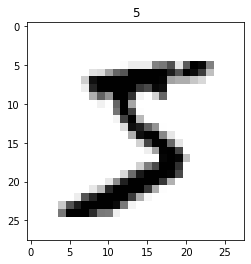

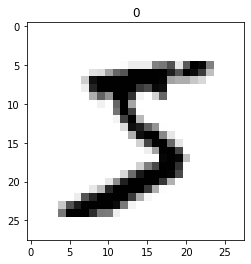

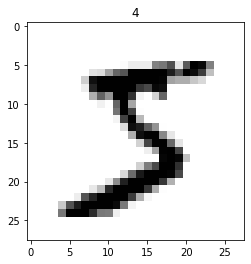

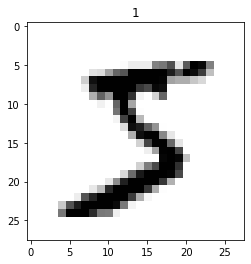

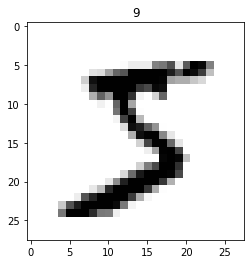

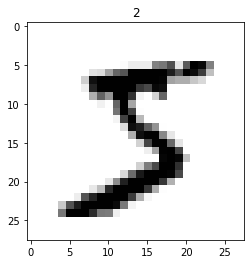

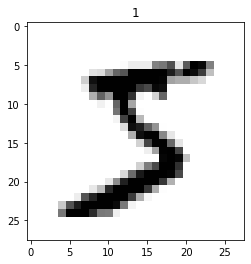

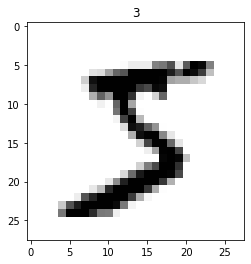

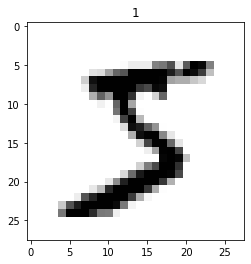

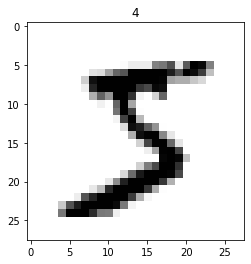

In [88]:
for i in range(10):
    plot_input_img(i)

In [89]:
# Pre process the data
# Normalizing the image to 0-1 range to (28,28,1)  
X_train - X_train.astype('float32') / 255
X_test - X_test.astype('float32') / 255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [90]:
# Convert classes to one-hot vectors
y_train = keras .utils.to_categorical(y_train, 10)
y_test = keras .utils.to_categorical(y_test, 10)


In [91]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2))) 

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [93]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [94]:
# Callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping

es = EarlyStopping(monitor='val_loss', min_delta= 0.01, verbose=1, patience=4)

# Model Checkpoint

mc = ModelCheckpoint('./best_model.h5', monitor='val_acc', verbose=1, save_best_only=True) 

cb = [es, mc]

In [95]:
his = model.fit(X_train, y_train, epochs = 5, verbose=1, validation_split=0.3, callbacks=cb)

Epoch 1/5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.4363 - accuracy: 0.9214 - val_loss: 0.0790 - val_accuracy: 0.9761
Epoch 2/5
1313/1313 [==============================] - 47s 35ms/step - loss: 0.0985 - accuracy: 0.9703 - val_loss: 0.0718 - val_accuracy: 0.9800
Epoch 3/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0782 - accuracy: 0.9764 - val_loss: 0.0728 - val_accuracy: 0.9777
Epoch 4/5
1313/1313 [==============================] - 51s 39ms/step - loss: 0.0652 - accuracy: 0.9797 - val_loss: 0.0625 - val_accuracy: 0.9813
Epoch 5/5
1313/1313 [==============================] - 52s 40ms/step - loss: 0.0646 - accuracy: 0.9799 - val_loss: 0.0643 - val_accuracy: 0.9809


In [96]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 98.27%


In [97]:
model.save('mnist.h5')